In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os, sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

sys.path.append('..')
import deepomics

from deepomics import neuralnetwork as nn
from deepomics import utils, fit

# load Frey faces dataset

In [2]:
fname = '../data/frey_rawface.mat'

from scipy.io import loadmat
matfile = loadmat(fname)
all_data = (matfile['ff'] / 255.).T
indices = np.arange(len(all_data))
np.random.shuffle(indices)

# split dataset into train and validation 
X_train = all_data[indices[:1500]]
X_valid = all_data[indices[1500:]]

# place data as a dictionary
train = {'inputs': X_train, 'targets': X_train}
valid = {'inputs': X_valid, 'targets': X_valid}

width = 20
height = 28
input_shape = [None, width*height]
output_shape = [None, width*height]

In [4]:
def model(input_shape, output_shape):

    # create model
    layer1 = {'layer': 'input', #41
            'input_shape': input_shape
            }
    layer2 = {'layer': 'dense',
            'num_units': 128,
            'activation': 'relu',
            #'dropout': 0.1,
            }
    layer3 = {'layer': 'variational_normal',
            'num_units': 30,
            'name': 'Z',
            }
    layer4 = {'layer': 'dense',
            'num_units': 128,
            'activation': 'relu',
            #'dropout': 0.1,
            }
    layer5 = {'layer': 'variational_normal',
            'num_units': output_shape[1],
            'activation': 'sigmoid',
            'name': 'X'
             }
    
    #from tfomics import build_network
    model_layers = [layer1, layer2, layer3, layer4, layer5]

    # optimization parameters
    optimization = {"objective": "elbo_gaussian_gaussian",
                  "optimizer": "adam",
                  "learning_rate": 0.0003,
                  "beta1": 0.9, 
                  #"l2": 1e-6,
                  }
    return model_layers, optimization


# get model info
model_layers, optimization = model(input_shape, output_shape)

# build neural network class
nnmodel = nn.NeuralNet(seed=247)
nnmodel.build_layers(model_layers, optimization, supervised=False)
nnmodel.inspect_layers()

# compile neural trainer
model_save_path = os.path.join('../results', 'frey')
nntrainer = nn.NeuralTrainer(nnmodel, save='best', file_path=model_save_path)

----------------------------------------------------------------------------
Network architecture:
----------------------------------------------------------------------------
layer1: inputs
(?, 560)
layer2: dense_0
(?, 128)
layer3: dense_0_bias
(?, 128)
layer4: dense_0_active
(?, 128)
layer5: Z_mu
(?, 30)
layer6: Z_logvar
(?, 30)
layer7: Z_sample
(?, 30)
layer8: dense_1
(?, 128)
layer9: dense_1_bias
(?, 128)
layer10: dense_1_active
(?, 128)
layer11: X_mu
(?, 560)
layer12: X_logvar
(?, 560)
layer13: X_sample
(?, 560)
layer14: X
(?, 560)
----------------------------------------------------------------------------


# Start the session

In [5]:
# initialize session
sess = utils.initialize_session()

# Train the model with KL-weight annealing  (Starts from an autoencoder and becomes a fully VAE model over time)

In [6]:
data = {'train': train, 'valid': valid}
fit.train_minibatch(sess, nntrainer, data, batch_size=128,
                    num_epochs=500, patience=20, verbose=1, shuffle=True)

Epoch 1 out of 500 
  valid loss:		375.17281
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 2 out of 500 
  valid loss:		31.92369
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 3 out of 500 
  valid loss:		-268.32437
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 4 out of 500 
  valid loss:		-419.60052
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 5 out of 500 
  valid loss:		-471.30425
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 6 out of 500 
  valid loss:		-491.19909
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 7 out of 500 
  valid loss:		-505.54077
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 8 out of 500 
  valid loss:		-516.59283
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 9 out of 500 

  valid loss:		-914.31165
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 77 out of 500 
  valid loss:		-910.62979
Epoch 78 out of 500 
  valid loss:		-913.62437
Epoch 79 out of 500 
  valid loss:		-920.72154
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 80 out of 500 
  valid loss:		-919.98805
Epoch 81 out of 500 
  valid loss:		-919.82349
Epoch 82 out of 500 
  valid loss:		-924.18111
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 83 out of 500 
  valid loss:		-928.60588
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 84 out of 500 
  valid loss:		-929.56354
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 85 out of 500 
  valid loss:		-928.15698
Epoch 86 out of 500 
  valid loss:		-914.01604
Epoch 87 out of 500 
  valid loss:		-927.36156
Epoch 88 out of 500 
  valid loss:		-935.53983
  lower cross-validation 

Epoch 181 out of 500 
  valid loss:		-1032.05508
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 182 out of 500 
  valid loss:		-1036.13348
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 183 out of 500 
  valid loss:		-1033.06891
Epoch 184 out of 500 
  valid loss:		-1036.00291
Epoch 185 out of 500 
  valid loss:		-1033.95062
Epoch 186 out of 500 
  valid loss:		-1032.89517
Epoch 187 out of 500 
  valid loss:		-1034.63789
Epoch 188 out of 500 
  valid loss:		-1036.98344
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 189 out of 500 
  valid loss:		-1035.32378
Epoch 190 out of 500 
  valid loss:		-1038.79944
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 191 out of 500 
  valid loss:		-1033.46288
Epoch 192 out of 500 
  valid loss:		-1036.61719
Epoch 193 out of 500 
  valid loss:		-1043.45737
  lower cross-validation found
  saving model to:  ../r

  valid loss:		-1089.36691
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 306 out of 500 
  valid loss:		-1092.50400
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 307 out of 500 
  valid loss:		-1092.42807
Epoch 308 out of 500 
  valid loss:		-1092.50876
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 309 out of 500 
  valid loss:		-1093.30252
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 310 out of 500 
  valid loss:		-1085.26068
Epoch 311 out of 500 
  valid loss:		-1090.09592
Epoch 312 out of 500 
  valid loss:		-1091.42798
Epoch 313 out of 500 
  valid loss:		-1090.79010
Epoch 314 out of 500 
  valid loss:		-1091.12524
Epoch 315 out of 500 
  valid loss:		-1095.61945
  lower cross-validation found
  saving model to:  ../results/frey_best.ckpt
Epoch 316 out of 500 
  valid loss:		-1091.94943
Epoch 317 out of 500 
  valid loss:		-1089.06094


  valid loss:		-1113.01727
Epoch 436 out of 500 
  valid loss:		-1108.21661
Epoch 437 out of 500 
  valid loss:		-1118.17969
Epoch 438 out of 500 
  valid loss:		-1117.44287
Epoch 439 out of 500 
  valid loss:		-1117.91434
Epoch 440 out of 500 
  valid loss:		-1110.96106
Epoch 441 out of 500 
  valid loss:		-1110.30737
Epoch 442 out of 500 
  valid loss:		-1114.99792
Epoch 443 out of 500 
  valid loss:		-1119.67148
Epoch 444 out of 500 
  valid loss:		-1114.86972
Epoch 445 out of 500 
  valid loss:		-1112.52649
Epoch 446 out of 500 
  valid loss:		-1118.25494
Epoch 447 out of 500 
  valid loss:		-1118.49814
Epoch 448 out of 500 
  valid loss:		-1117.38052
Epoch 449 out of 500 
  valid loss:		-1110.15536
Epoch 450 out of 500 
  valid loss:		-1118.37720
Epoch 451 out of 500 
  valid loss:		-1114.21817
Epoch 452 out of 500 
  valid loss:		-1114.95853
Patience ran out... Early stopping.


# Visualize samples about the latent space mapped by the original image

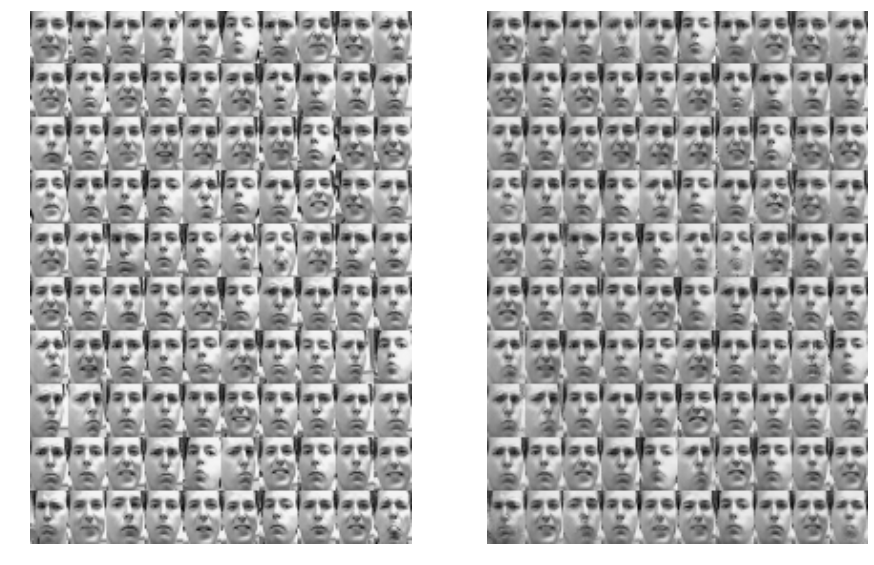

In [7]:
num_grid = 10
shuffle = np.random.permutation(X_train.shape[0])
X_data = X_train[shuffle[:num_grid*num_grid]]

samples = nntrainer.get_activations(sess, {'inputs': X_data}, layer='X')

fig = plt.figure()
ax = plt.subplot(1,2,1);
ax.imshow((X_data.reshape(num_grid, num_grid, 28, 20)
                   .transpose(0, 2, 1, 3)
                   .reshape(num_grid*28, num_grid*20)), cmap='gray')
ax.axis('off')
ax = plt.subplot(1,2,2);
ax.imshow((samples.reshape(num_grid, num_grid, 28, 20)
                   .transpose(0, 2, 1, 3)
                   .reshape(num_grid*28, num_grid*20)), cmap='gray')
ax.axis('off')
fig.set_size_inches(15,15)

# visualize the latent space learned by the VAE

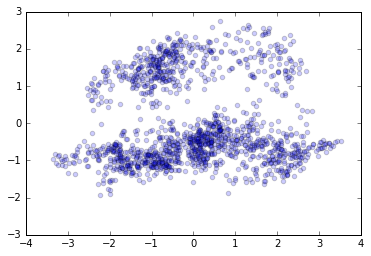

In [9]:
# extract latent space for training data
Z = nntrainer.get_activations(sess, {'inputs': X_train}, layer='Z_mu')

# perform PCA on latent space
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Z_reduce = pca.fit_transform(Z)

# plot reduced latent space
fig = plt.figure()
plt.scatter(Z_reduce[:,0], Z_reduce[:,1], alpha=0.2)